In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc

from tournament import seq_tournament, parallel_tournament

In [19]:
N = 16
q = 1e-4
k = 4
n_epochs = 1000

In [20]:
winners_rank = np.zeros(n_epochs)

In [21]:
for run in range(n_epochs):
    winner_rank = parallel_tournament(k, q, strength_distrib='uniform', power=3)
    winners_rank[run] = winner_rank

In [22]:
n_bins = 100

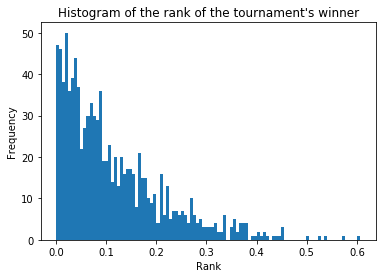

In [23]:
plt.hist(winners_rank, bins=n_bins)
plt.title("Histogram of the rank of the tournament's winner")
plt.xlabel("Rank")
plt.ylabel("Frequency")

In [24]:
ranks_hist, bin_edges = np.histogram(winners_rank, normed=False, bins=n_bins)

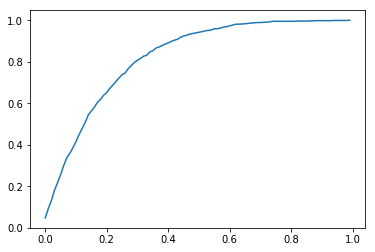

In [25]:
plt.plot(np.arange(n_bins)/n_bins, np.cumsum(ranks_hist)/n_epochs)

In [26]:
auc(np.arange(n_bins)/n_bins, np.cumsum(ranks_hist)/n_epochs)

0.81380500000000011

In [27]:
def upset_linear(rank_strong, rank_weak):
    return 0.5 - (rank_weak - rank_strong) / 2

In [33]:
def upset_quadra(rank_strong, rank_weak):
    return 0.5 - (rank_weak - rank_strong)**2 / 2

In [39]:
def upset_cubic(rank_strong, rank_weak):
    return 0.5 - (rank_weak - rank_strong)**3 / 2

In [60]:
for run in range(n_epochs):
    winner_rank = parallel_tournament(k, 0.2, strength_distrib='power', power=3)
    winners_rank[run] = winner_rank

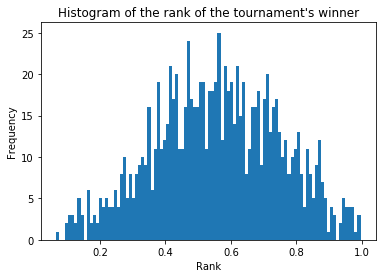

In [61]:
plt.hist(winners_rank, bins=n_bins)
plt.title("Histogram of the rank of the tournament's winner")
plt.xlabel("Rank")
plt.ylabel("Frequency")

In [62]:
ranks_hist, bin_edges = np.histogram(winners_rank, normed=False, bins=n_bins)

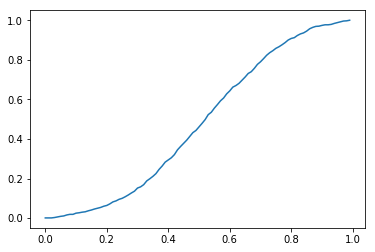

In [63]:
plt.plot(np.arange(n_bins)/n_bins, np.cumsum(ranks_hist)/n_epochs)

In [64]:
auc(np.arange(n_bins)/n_bins, np.cumsum(ranks_hist)/n_epochs)

0.47048499999999999

In [ ]:
def auc_for_upset_parallel(k, q, n_epochs=1000, n_bins=100, **kwargs):
    winners_rank = np.zeros(n_epochs)
    for run in range(n_epochs):
        winner_rank = parallel_tournament(k, q, **kwargs)
        winners_rank[run] = winner_rank
    ranks_hist, bin_edges = np.histogram(winners_rank, normed=False, bins=n_bins)
    return auc(np.arange(n_bins)/n_bins, np.cumsum(ranks_hist)/n_epochs)

In [ ]:
upsets = [0.07, 0.1, 0.2, 0.4, 0.45, 0.5]

In [ ]:
aucs = [auc_for_upset_parallel(k, upset, n_epochs=1000, n_bins=1000, strength_distrib='uniform', power=4) for upset in upsets]

In [ ]:
plt.plot(upsets, aucs)
plt.title("Evolution of the AUC function of the upset")
plt.xlabel("Upset")
plt.ylabel("AUC")